<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [2]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [8]:
# Write your code here
#df.dtypes
#df.shape
df.isna().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [11]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [22]:
# Write your code here
#df['Country'].value_counts().sort_index().tail(50)
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here
# country_map = {
#     "Usa": "United States",
#     "U.S.A": "United States",
#     "United states": "United States",
#     "UK": "United Kingdom",
#     "U.K.": "United Kingdom"
# }

# df['Country'] = df['Country'].replace(country_map)

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [4]:
## Write your code here
employ_dummies = df['Employment'].str.get_dummies(sep=';')
employ_dummies

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
65432,1,0,0,0,0,0,0,0,0
65433,1,0,0,0,0,0,0,0,0
65434,1,0,0,0,0,0,0,0,0
65435,1,0,0,0,0,0,0,0,0


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [35]:
## Write your code her
employ_dummies.sum().sort_values(ascending=False) # .idxmax() para el mayor

Employed, full-time                                     45162
Independent contractor, freelancer, or self-employed    10726
Student, full-time                                       8626
Employed, part-time                                      4145
Not employed, but looking for work                       3954
Student, part-time                                       2656
Not employed, and not looking for work                   1203
Retired                                                   681
I prefer not to say                                       546
dtype: int64

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [6]:
## Write your code here
#df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean().round(), inplace=True)
df['ConvertedCompYearly'].value_counts().sort_values(ascending=False).head()

/tmp/ipykernel_1939/107531757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean().round(), inplace=True)


ConvertedCompYearly
86155.0    42002
64444.0      321
53703.0      308
75184.0      230
85925.0      226
Name: count, dtype: int64

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [18]:
## Write your code here
df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax(), inplace=True)
#df['RemoteWork'].value_counts().sort_values(ascending=False)

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [26]:
## Write your code here
norm_ConvertedCompYearly = ((df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min()))
norm_ConvertedCompYearly

0        0.0053
1        0.0053
2        0.0053
3        0.0053
4        0.0053
          ...  
65432    0.0053
65433    0.0053
65434    0.0053
65435    0.0053
65436    0.0053
Name: ConvertedCompYearly, Length: 65437, dtype: float64

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [34]:
## Write your code here
import numpy as np
np.log1p(df['ConvertedCompYearly'])

0        11.363915
1        11.363915
2        11.363915
3        11.363915
4        11.363915
           ...    
65432    11.363915
65433    11.363915
65434    11.363915
65435    11.363915
65436    11.363915
Name: ConvertedCompYearly, Length: 65437, dtype: float64

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [80]:
## Write your code here

# Reemplazo los valores nulos con el valor mas frequente
#df['YearsCodePro'].fillna(df['YearsCodePro'].value_counts().idxmax)

#Remplazo los valores tipo string por tipo numerico
df['YearsCodePro'].replace(['Less than 1 year','More than 50 years'], ['0','50'], inplace=True)

#Regularizo la columna para trabajarla como tipo numerico
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

#Creo contenedores para separar los valores en rangos
bins = [0, 1, 2, 5, 10, 15, 25, 35, 80]
labels = ['Less than 1 year', '1-2 Years', '3-5 Years', '6-10 Years', '11-15 Years', '16-25 Years', '26-35 Years', '36 or more Years']

#Aplico los rangos a la columna y lo guardo en una varaible
ExperienceLevel = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

#df['YearsCodePro'].fillna(df['YearsCodePro'].value_counts().idxmax(), inplace=True)
#ExperienceLevel =

([<matplotlib.patches.Wedge at 0x788acb315520>,
 [Text(0.7143998876668849, 0.8364405540751491, 'Less than 1 year'),
  Text(-0.7614147156615889, 0.7938813707185614, '1-2 Years'),
  Text(-1.043698847556794, -0.3474085715819629, '3-5 Years'),
  Text(-0.3900199044424268, -1.02853511079531, '6-10 Years'),
  Text(0.3640244164069138, -1.0380203390394651, '11-15 Years'),
  Text(0.8843735469817161, -0.654127991603309, '16-25 Years'),
  Text(1.0703028654562323, -0.2538735437106007, '26-35 Years'),
  Text(1.098817257276081, -0.05099642254385159, '36 or more Years')],
 [Text(0.38967266600011896, 0.45624030222280854, '27.5%'),
  Text(-0.4153171176335939, 0.43302620221012433, '19.3%'),
  Text(-0.569290280485524, -0.18949558449925247, '16.6%'),
  Text(-0.21273812969586914, -0.5610191513428963, '11.7%'),
  Text(0.19855877258558932, -0.5661929122033446, '10.6%'),
  Text(0.482385571080936, -0.3567970863290776, '8.4%'),
  Text(0.5838015629761267, -0.13847647838760038, '4.5%'),
  Text(0.599354867605135, -

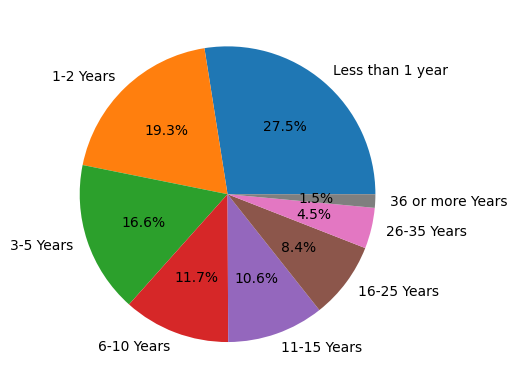

In [88]:
import matplotlib.pyplot as plt
plt.pie(ExperienceLevel.value_counts(), labels=labels, autopct='%1.1f%%')

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
